<a href="https://colab.research.google.com/github/sawsanzaky/-Banking_Finance-GARCH-Models-in-Python/blob/main/Simulate_ARCH_and_GARCH_series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **ARCH and GARCH** :Auto Regressive Conditional Heteroskedasticity 



will simulate an ARCH(1) and GARCH(1,1) time series respectively using a predefined function simulate_GARCH(n, omega, alpha, beta = 0).

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#from arch import arch_model


In [31]:
!git clone https://github.com/sawsanzaky/-Banking_Finance-GARCH-Models-in-Python

fatal: destination path '-Banking_Finance-GARCH-Models-in-Python' already exists and is not an empty directory.




---



---



In [32]:
sp_price= pd.read_csv("/content/-Banking_Finance-GARCH-Models-in-Python/SP500.csv")
print(sp_price.head(2))


         Date    Close    Return
0  2010/07/01  1027.37 -0.324048
1  2010/07/02  1022.58 -0.466239


**function of simulation **

In [38]:
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

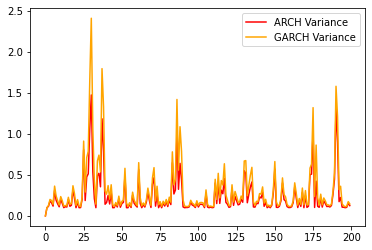

In [40]:
# Simulate a ARCH(1) series

arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)

# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

**Observe the impact of model parameters**

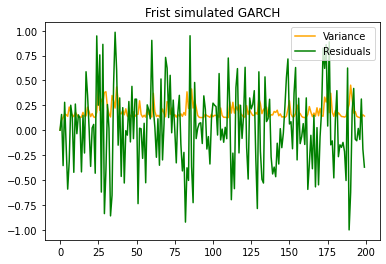

In [44]:
# First simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.title("Frist simulated GARCH")
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

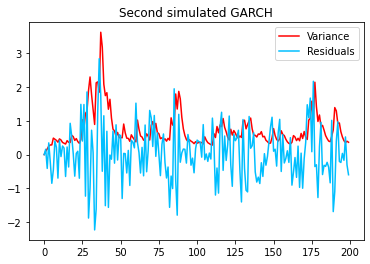

In [43]:
# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.title("Second simulated GARCH")
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()